In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re
import scipy as sci
import time

In [ ]:
# global vars
samp_rt = 5120 #sampling rate Hz
time_import = 3000 # time to analyse seconds
data_import = samp_rt * time_import # lines of data to import

In [ ]:
def list_o_list(big_list, lil_size):
    l_o_l = []
    for i in range(0, len(big_list), lil_size):
        lil = big_list[i : min(i + lil_size, len(big_list))]
        l_o_l.append(lil)
    return(l_o_l)

In [ ]:
# def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
#     frqs = ""
#     amps = []
#     samp_int = 1/sampfrq
#     ft = np.fft.fft(sample)/len(sample)
# #     mmhic = time.perf_counter()
#     ft = ft[range(int(len(sample)/2))]
#     tpCount = len(sample)
#     values = np.arange(int(tpCount/2))
#     timePeriod = tpCount/sampfrq
#     frequencies = values/timePeriod
#     ft = abs(ft)
# #     mmcup = time.perf_counter()
#     #print(len(ft))
#     #print(len(frequencies))
#     feq = pd.DataFrame(data = {"freq":frequencies})
# #     l1 = time.perf_counter()
#     feq["amp"] = ft
# #     l2 = time.perf_counter()
#     frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
# #     l3 = time.perf_counter()
#     #print(len(frqs))
#     mmbless = time.perf_counter()
#     for n in frqs:
#         cu = feq.loc[(feq.freq > n ) & (feq.freq <= n + responsefrq),"amp"].mean()
        
#         amps.append(cu)
# #     l4 = time.perf_counter()
# #     mmtoc = time.perf_counter()
# #     print("init:", mmhic-mmtic)
# #     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
# #     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
# #     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
# #     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
# #     print("for:", l4 - l3)
#     return(frqs, amps, feq)

In [63]:
def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
    frqs = ""
    amps = []
    samp_int = 1/sampfrq
    ft = np.fft.fft(sample)/len(sample)
#     mmhic = time.perf_counter()
    ft = ft[range(int(len(sample)/2))]
    tpCount = len(sample)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/sampfrq
    frequencies = values/timePeriod
    ft = abs(ft)
#     mmcup = time.perf_counter()
    #print(len(ft))
    #print(len(frequencies))
    feq = pd.DataFrame(data = {"freq":frequencies})
#     l1 = time.perf_counter()
    feq["amp"] = ft
#     l2 = time.perf_counter()
    frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
#     l3 = time.perf_counter()
    #print(len(frqs))
#     mmbless = time.perf_counter()
    wow = feq.amp.rolling(responsefrq).mean()
    yep = np.arange(responsefrq - 1, len(wow) + responsefrq  -1, responsefrq)
    amps = wow[yep]
#     l4 = time.perf_counter()
#     mmtoc = time.perf_counter()
#     print("init:", mmhic-mmtic)
#     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
#     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
#     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
#     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
#     print("for:", l4 - l3)
    return(frqs, amps)

In [6]:
test_list  = list(range(1,33,4))
test_chop = 9
print(list_o_list(test_list, test_chop))


[[1, 5, 9, 13, 17, 21, 25, 29]]


In [7]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '01-08-19-V118',
 '03-05-19-V118',
 '03-26-19-V118',
 '08-14-18-V118',
 'data_prep.ipynb',
 'data_prep_development.ipynb',
 'EDA.ipynb',
 'EDA2.ipynb',
 'eda2_b.ipynb',
 'GPS Files',
 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx',
 'Skytrain Linear Asset Database - Consolidated.xlsx',
 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx',
 'Switch Maint Works to date - April 2019.xlsx',
 'Test Train Sample Noise Data',
 'Test Train Sample Noise Data.zip']

In [8]:
home = os.getcwd()


In [9]:

os.chdir("08-14-18-V118")
os.getcwd()

'C:\\Users\\tnank\\Documents\\GitHub\\project-sturm_drang\\08-14-18-V118'

In [10]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [11]:
print(files)

['.hubstorinfo', '08-14-18-V118_ch1.csv', '08-14-18-V118_ch2.csv', 'ft_first_3000.csv']


In [12]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"], nrows = data_import)
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"], nrows = data_import)
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")
del df
del df2

In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15360000 entries, 0 to 15359999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 468.8 MB


In [19]:
acc_a = list(raw.acceleration_a)
acc_b = list(raw.acceleration_b)


In [20]:
l1 = list_o_list(acc_a, 5120)


In [21]:
l2 = list_o_list(acc_b, 5120)

In [22]:
del acc_a
del acc_b

In [23]:
len(l1[0])

5120

In [62]:
bin_size = 1
tot_frqs = int((samp_rt / 2) / bin_size)
tic_a = time.perf_counter()
ft_l1 = np.empty((time_import, tot_frqs))
frq_l1 = np.empty(tot_frqs, np.int8)
for c,v in enumerate(l1):
    frq_l1, amp = freq_analysis(v, 1, bin_size, samp_rt)
    ft_l1[c] = amp
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 6.641625799999929


In [25]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc-mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 20.03781509999999


In [53]:
direct = pd.DataFrame(data = ft_l1, columns = frq_l1)

In [54]:
direct.head()

,0,10,20,30,40,50,60,70,80,90,...,2460,2470,2480,2490,2500,2510,2520,2530,2540,2550
0,0.002120,0.001354,0.002753,0.003536,0.003388,0.003214,0.002293,0.003222,0.006399,0.005293,...,0.000727,0.000684,0.000620,0.000515,0.000502,0.000490,0.000500,0.000491,0.000628,0.000644
1,0.002151,0.001013,0.001498,0.000944,0.001311,0.001398,0.001102,0.002411,0.003387,0.003406,...,0.000578,0.000674,0.000481,0.000390,0.000644,0.000568,0.000638,0.000520,0.000565,0.000557
2,0.001390,0.001138,0.001599,0.001492,0.002306,0.001750,0.001513,0.002771,0.002885,0.002098,...,0.000523,0.000511,0.000474,0.000559,0.000611,0.000576,0.000715,0.000494,0.000538,0.000629
3,0.001914,0.000891,0.001555,0.001254,0.002909,0.001737,0.002045,0.005397,0.007262,0.003899,...,0.000538,0.000588,0.000607,0.000532,0.000645,0.000356,0.000443,0.000433,0.000564,0.000482
4,0.001099,0.001058,0.001302,0.001118,0.001705,0.001267,0.002127,0.003661,0.002430,0.002269,...,0.000691,0.000534,0.000558,0.000605,0.000489,0.000668,0.000513,0.000504,0.000637,0.000547


In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(direct)
print(pca.explained_variance_)


[0.11363534 0.01775021]


In [69]:
p_scores = []
x_10 = np.arange(1, 200, 5)
for i in x_10:
    pca_n = PCA(n_components = i)
    pca_n.fit(direct)
    p_scores.append(sum(pca_n.explained_variance_))

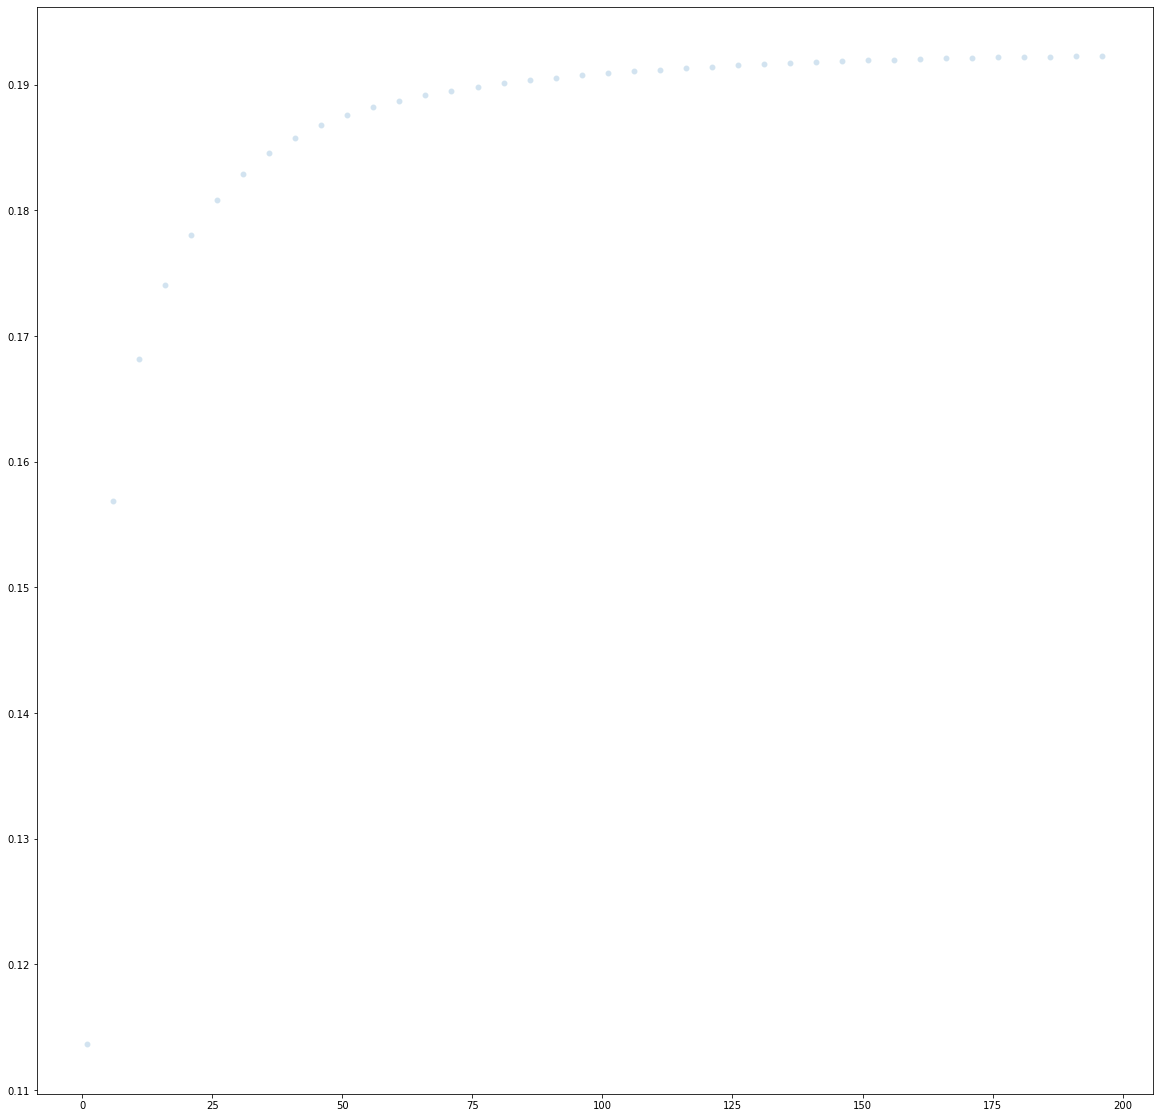

In [70]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=x_10, y=p_scores, alpha=0.2)
plt.show()

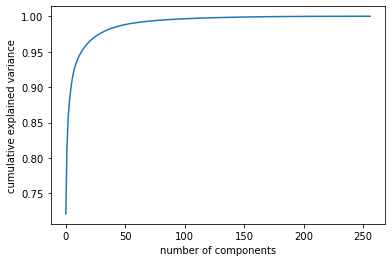

In [104]:
plots = PCA().fit(direct)
plt.plot(np.cumsum(plots.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [64]:
bin_size = 1
tot_frqs = int((samp_rt / 2) / bin_size)
tic_a = time.perf_counter()
ft_l1 = np.empty((time_import, tot_frqs))
frq_l1 = np.empty(tot_frqs, np.int8)
for c,v in enumerate(l1):
    frq_l1, amp = freq_analysis(v, 1, bin_size, samp_rt)
    ft_l1[c] = amp
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 5.9576007999994545


In [65]:
direct_l = pd.DataFrame(data = ft_l1, columns = frq_l1)

In [66]:
direct_l.head()

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,0.006682,0.002864,0.002063,0.002576,0.001487,0.002265,0.001246,0.000746,0.000736,0.000537,...,0.000495,0.000315,0.000348,0.000591,0.000322,0.000325,0.001402,0.000727,0.001280,0.000640
1,0.002425,0.007835,0.002404,0.000887,0.000793,0.000488,0.000534,0.002048,0.002647,0.001445,...,0.000657,0.000648,0.000588,0.000177,0.001256,0.000369,0.000257,0.000416,0.000364,0.000833
2,0.002731,0.003588,0.000033,0.000882,0.002076,0.001844,0.000216,0.000542,0.000989,0.000998,...,0.000518,0.000612,0.001110,0.000500,0.001193,0.000226,0.000744,0.000311,0.000330,0.000746
3,0.003042,0.007249,0.002595,0.001512,0.000399,0.000641,0.001379,0.000632,0.000649,0.001042,...,0.000213,0.000310,0.000470,0.000281,0.001108,0.000677,0.000259,0.000366,0.000533,0.000601
4,0.000650,0.004082,0.000761,0.000169,0.001066,0.001146,0.000524,0.000194,0.001489,0.000912,...,0.000431,0.000960,0.000328,0.000074,0.000431,0.000369,0.000325,0.000886,0.000478,0.001188


In [73]:
p_scores_l = []
x_l = np.arange(1, 600, 10)
for i in x_l:
    pca_n = PCA(n_components = i)
    pca_n.fit(direct_l)
    p_scores_l.append(sum(pca_n.explained_variance_))

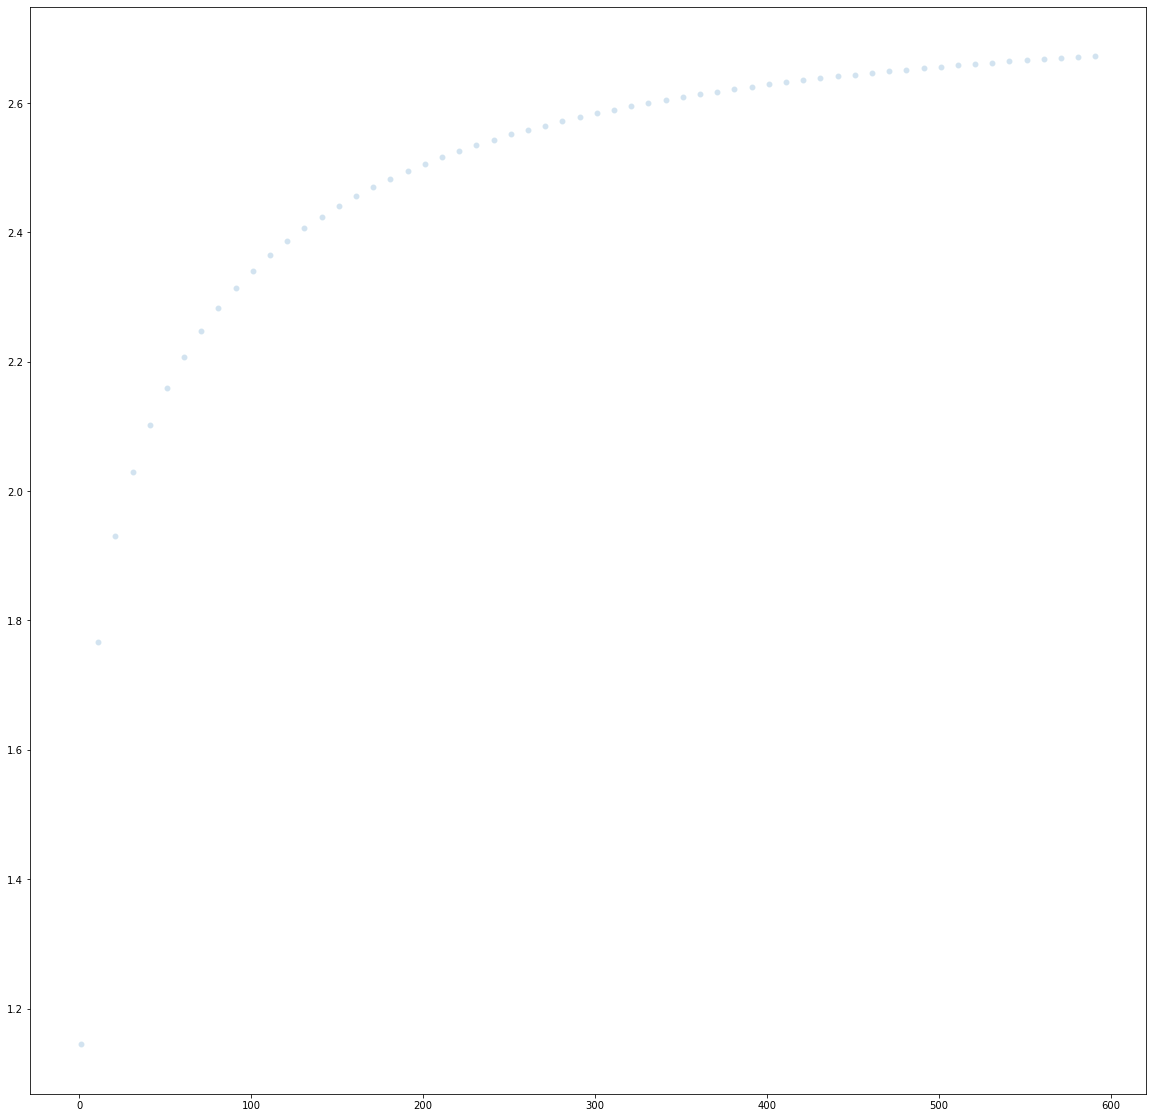

In [74]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=x_l, y=p_scores_l, alpha=0.2)
plt.show()

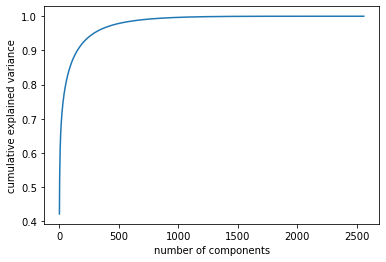

In [103]:
pca_l = PCA().fit(direct_l)
plt.plot(np.cumsum(pca_l.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [82]:
pca_direct = PCA(n_components=30).fit(direct)

In [83]:
type(pca_direct)

sklearn.decomposition._pca.PCA

In [85]:
p_direct = pca_direct.transform(direct)


In [87]:
p_df = pd.DataFrame(p_direct)
p_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.210370,-0.007065,0.002859,-0.012625,0.008144,-0.005405,0.005474,0.004778,-0.004882,0.002929,...,-0.001881,-0.000772,0.005383,-0.003657,0.002353,-0.003472,0.005368,-0.002111,-0.001002,-0.003571
1,-0.222795,-0.006021,0.005958,-0.019372,0.002181,-0.000933,0.002824,0.005821,-0.000357,0.000713,...,-0.002920,-0.001990,0.005427,-0.005307,0.000284,-0.003753,0.005405,-0.001297,-0.001528,-0.003059
2,-0.212544,-0.008747,0.000040,-0.008881,0.007110,-0.000342,0.007464,0.002573,-0.003706,0.001899,...,-0.002370,-0.000314,0.004548,-0.004750,-0.001744,-0.003521,0.005341,0.001378,-0.003784,-0.002168
3,-0.216713,-0.008906,0.004174,-0.012866,0.012880,0.001647,0.002643,0.004067,-0.005674,0.003049,...,-0.002845,-0.000474,0.004133,-0.002844,-0.002131,-0.002814,0.006581,-0.000671,-0.000697,-0.002508
4,-0.222818,-0.005826,0.005926,-0.012278,0.008845,-0.005149,0.006980,0.004730,-0.002677,-0.000511,...,-0.005901,-0.001692,0.007894,-0.004213,-0.000711,-0.006094,0.006570,-0.001142,0.002059,-0.002658


In [88]:
p_df.shape

(3000, 30)

In [99]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components =2).fit(p_df.iloc[:,1:])

In [100]:
gm_lab = GaussianMixture(n_components =2).fit_predict(p_df.iloc[:,1:])

In [101]:
p_df["lab"] = gm_lab

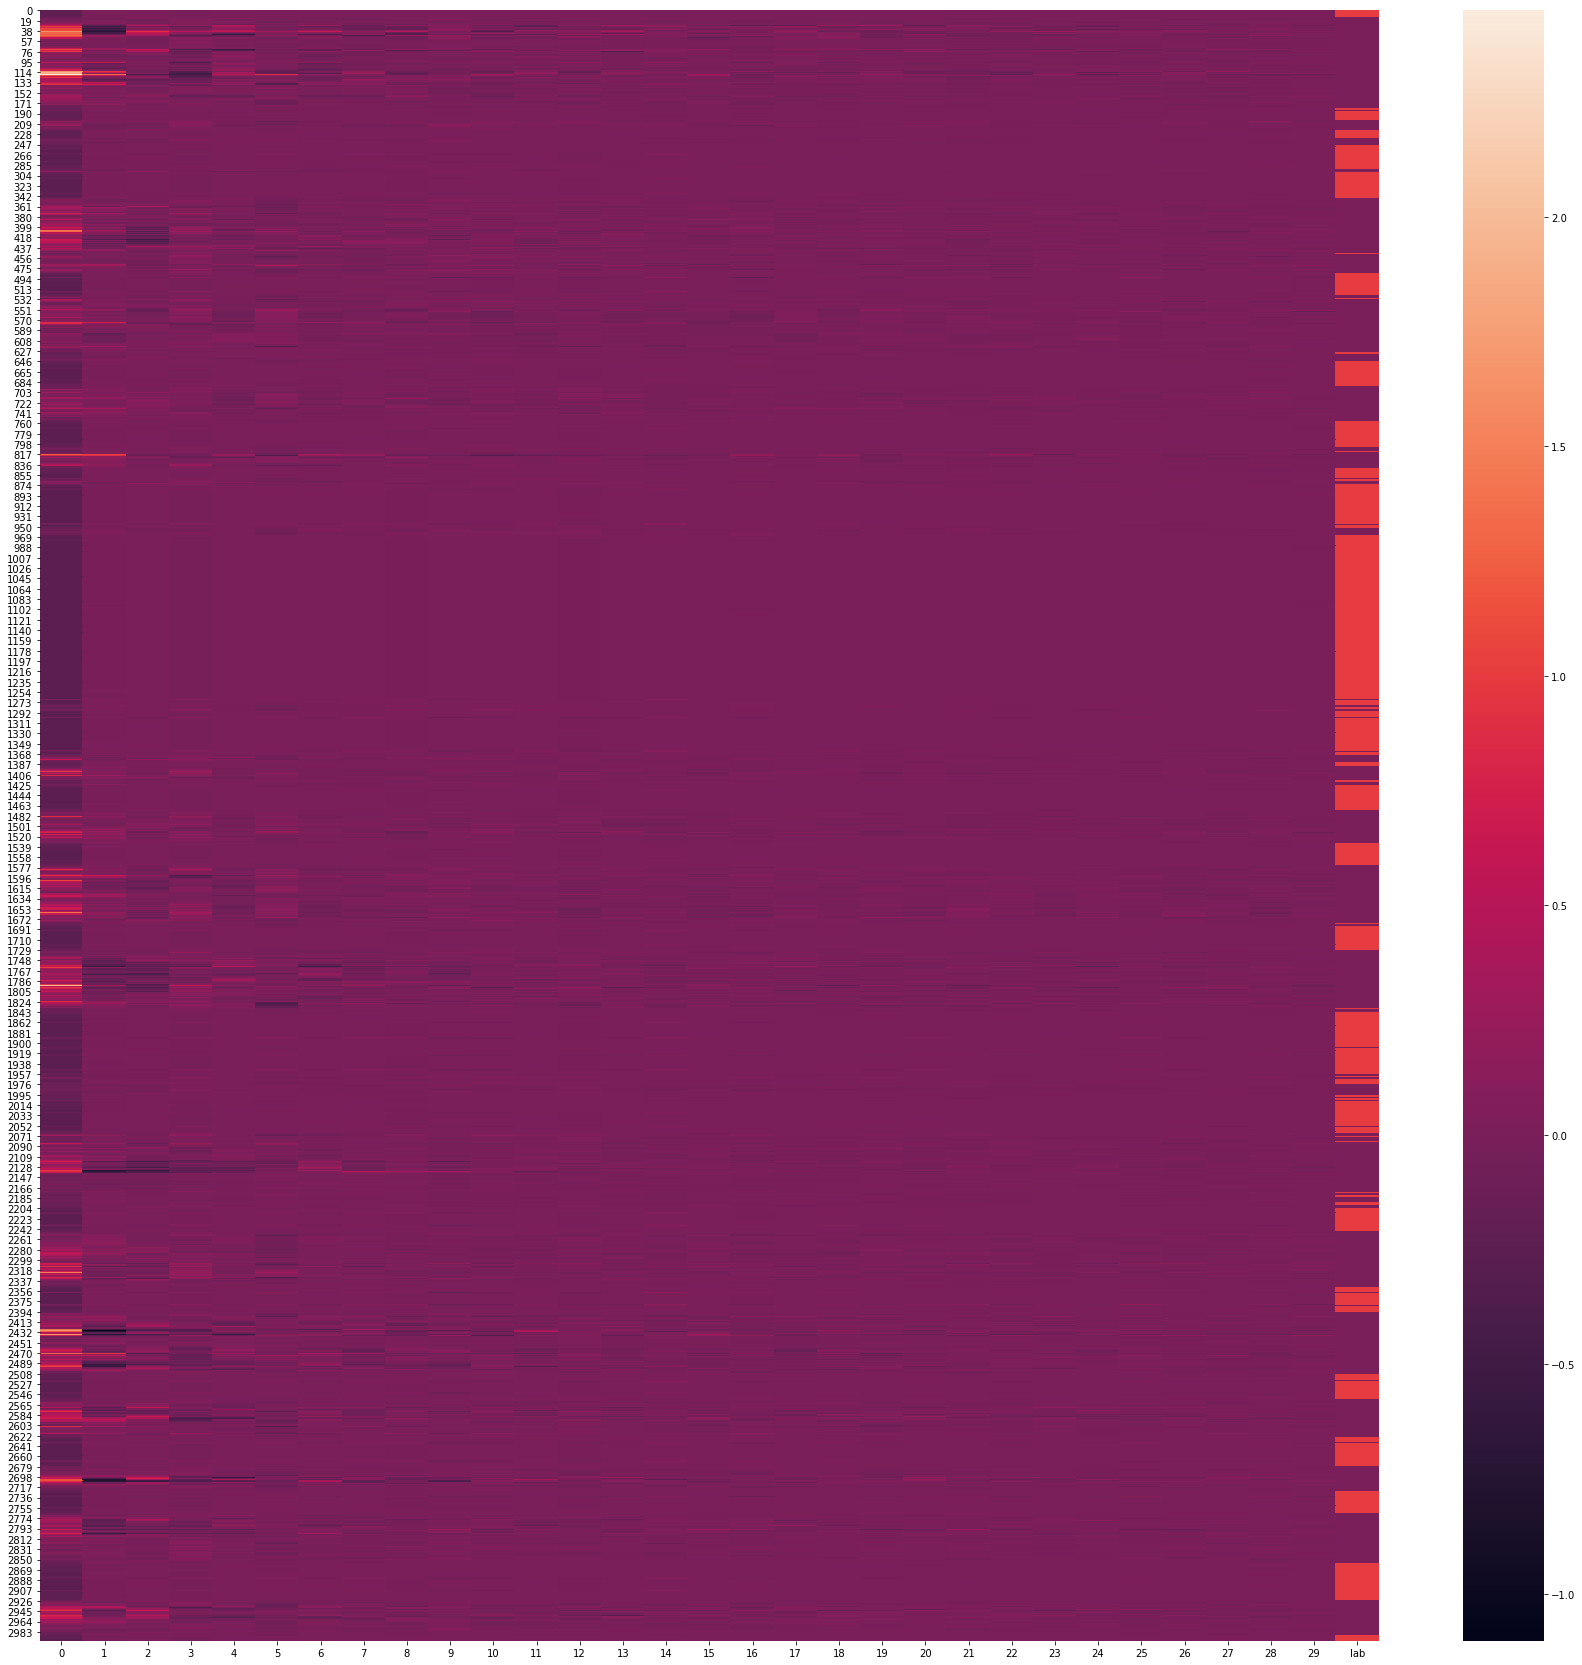

In [102]:
plt.figure(figsize=(30,30))
sb.heatmap(p_df)
plt.show()

In [95]:
gm_nat = GaussianMixture(n_components =2).fit(direct)
gm_lab_nat = GaussianMixture(n_components =2).fit_predict(direct)

In [96]:
direct["lab"] = gm_lab_nat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


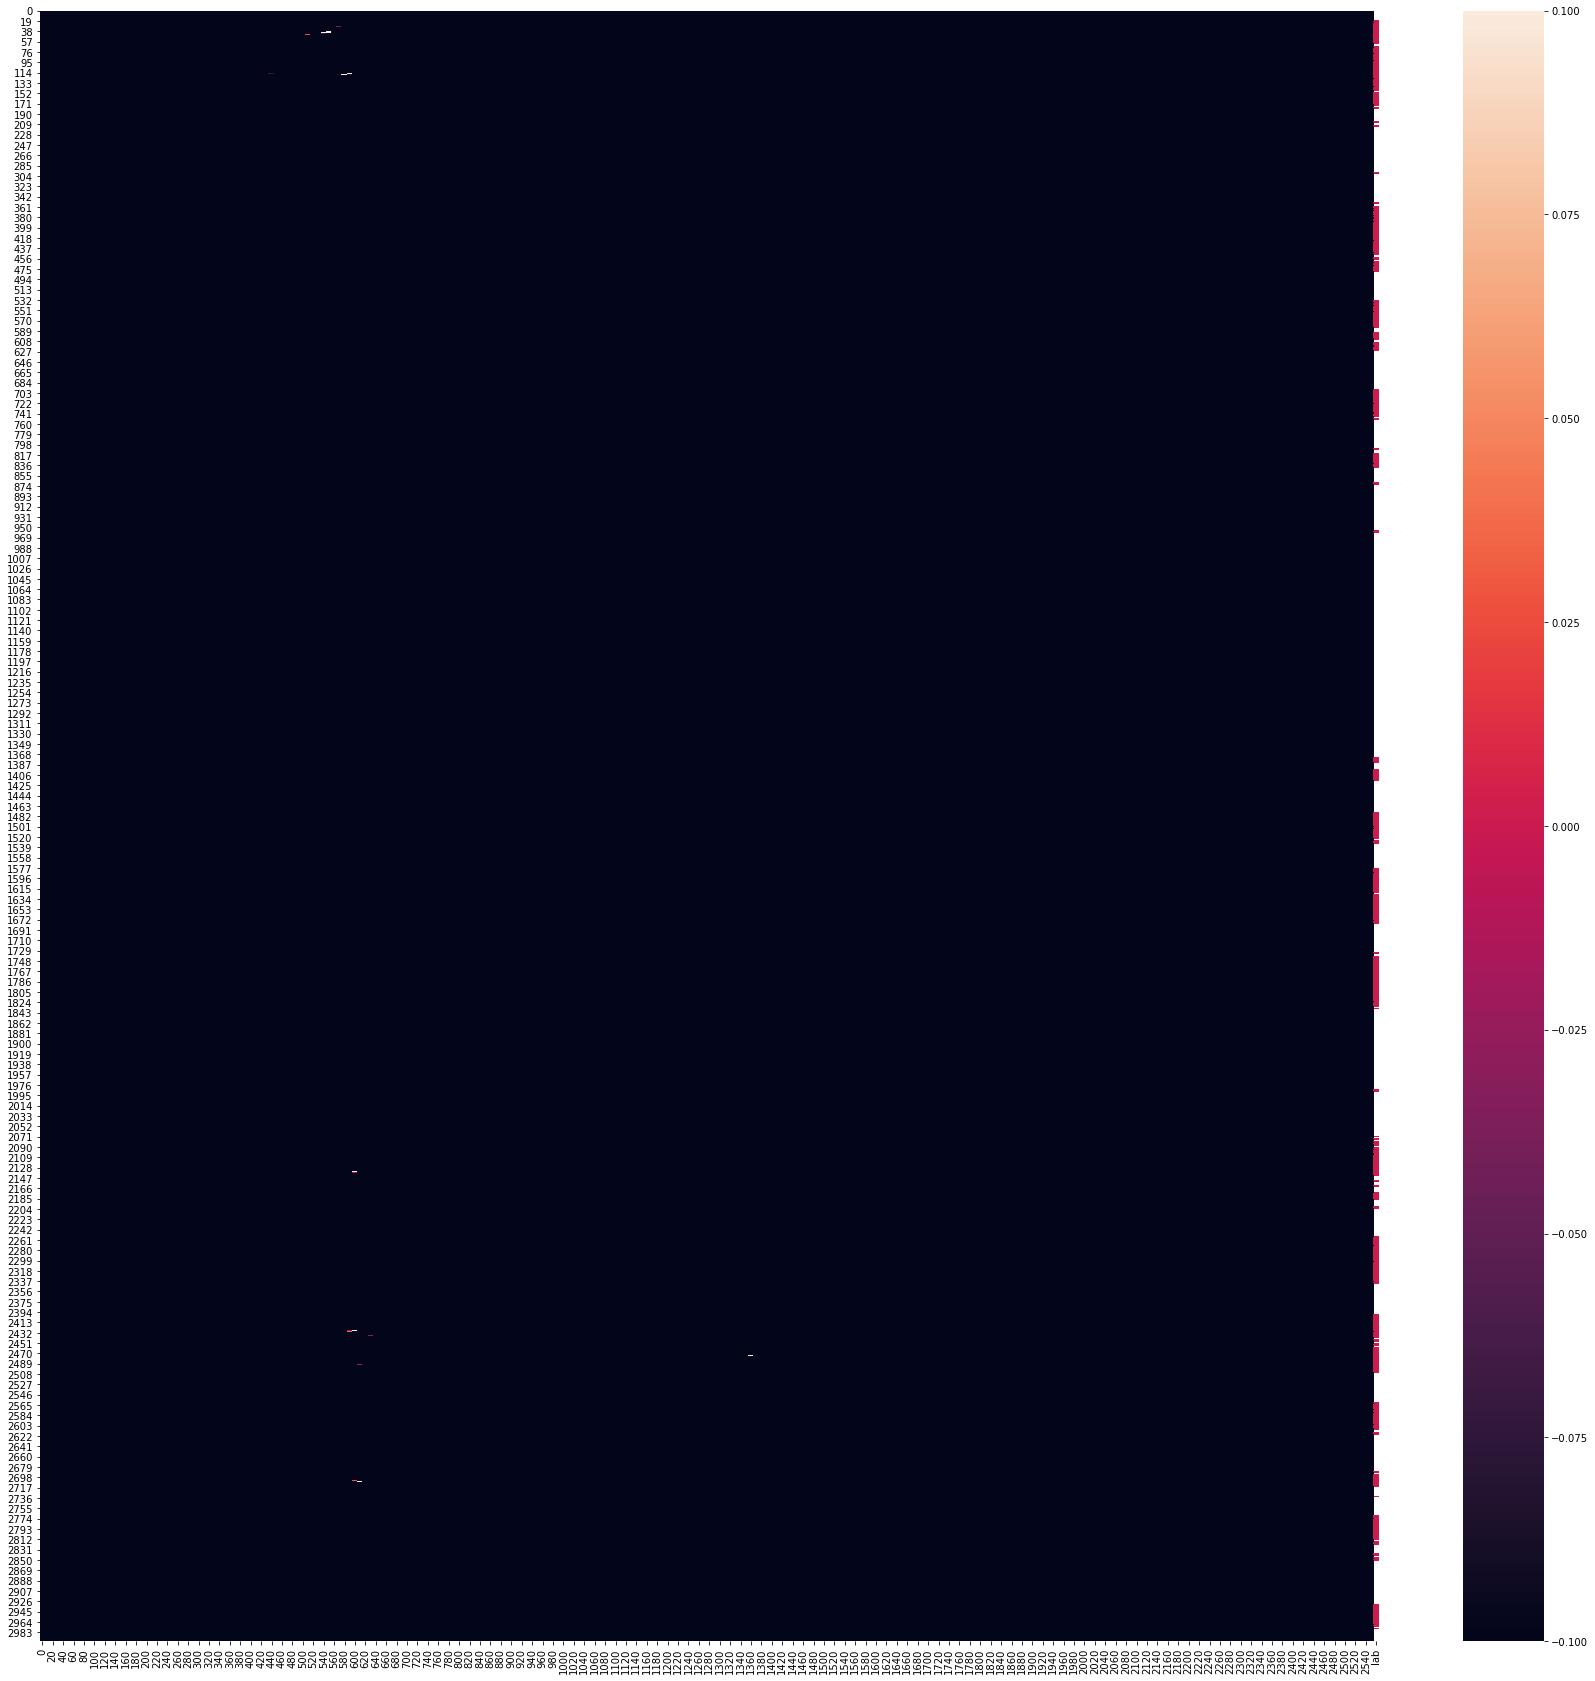

In [98]:
plt.figure(figsize=(30,30))
sb.heatmap(np.log(direct))
plt.show()

In [44]:
len(ft_l1)

3000

In [45]:
len(ft_l1[0])

256

In [46]:
len(frq_l1)

256

In [47]:
type(ft_l1)
type(frq_l1)

numpy.ndarray

In [48]:
type(ft_l1)

numpy.ndarray

In [49]:
ft_l1[0]

array([0.00212007, 0.00135408, 0.00275263, 0.00353608, 0.00338774,
       0.00321366, 0.00229252, 0.00322173, 0.00639889, 0.0052933 ,
       0.00323519, 0.00497568, 0.00368011, 0.00258446, 0.00263876,
       0.0036268 , 0.00267123, 0.00368135, 0.00701739, 0.01056506,
       0.00901775, 0.0084012 , 0.00765489, 0.00539574, 0.00483884,
       0.00392639, 0.00516009, 0.00416875, 0.00380163, 0.00509082,
       0.00415162, 0.00542597, 0.00435641, 0.00600706, 0.0059785 ,
       0.00586811, 0.00524717, 0.00465803, 0.00871752, 0.01611078,
       0.01276952, 0.00610195, 0.00568803, 0.00466283, 0.0066739 ,
       0.00519093, 0.00491895, 0.00489672, 0.00343469, 0.00378492,
       0.00537249, 0.00723648, 0.00724258, 0.00716893, 0.00721039,
       0.00879091, 0.00631257, 0.00889653, 0.00905829, 0.00854852,
       0.00910157, 0.00823064, 0.00829402, 0.00503124, 0.00770508,
       0.00756427, 0.00908748, 0.00660653, 0.00393696, 0.0041657 ,
       0.00396719, 0.00476478, 0.0027476 , 0.00274784, 0.00840

In [32]:
d_tst1 = {}
d_tst2 = {}
frq = ["a", "b", "c"]
amp = [[1, 2, 3], [1, 2, 3], [1, 2, 3], [2, 4, 6], [2, 4, 6], [2, 4, 6]]

In [33]:
tic = time.perf_counter()
for c,v in enumerate(frq):
    value = []
    for i in amp:
        value.append(i[c])
    key = str(v) + "_a"
    d_tst1[key] = value
toc = time.perf_counter()
print(toc-tic)
print(d_tst1.keys())
for i in d_tst1.keys():
    print(d_tst1[i])

0.0003995000000713844
dict_keys(['a_a', 'b_a', 'c_a'])
[1, 1, 1, 2, 2, 2]
[2, 2, 2, 4, 4, 4]
[3, 3, 3, 6, 6, 6]


In [34]:
tic = time.perf_counter()
n_amp = np.array(amp)
t_amp = np.transpose(n_amp)
d_tst2 = dict(zip(frq,t_amp))
toc = time.perf_counter()
print(toc-tic)
print(d_tst2.keys())
for i in d_tst2.keys():
    print(d_tst2[i])
    print(type(d_tst2[i]))

0.0003790000000662985
dict_keys(['a', 'b', 'c'])
[1 1 1 2 2 2]
<class 'numpy.ndarray'>
[2 2 2 4 4 4]
<class 'numpy.ndarray'>
[3 3 3 6 6 6]
<class 'numpy.ndarray'>


In [35]:
cols = []
for i in frq_l1:
    cols.append(str(i) + "_a")
#     cols.append(str(i) + "_b")

In [37]:
frq_l1.shape

(256,)

In [38]:
ft_l1.shape

AttributeError: 'list' object has no attribute 'shape'

In [36]:
amps = np.array(ft_l1)


In [82]:
df_m = pd.DataFrame(amps)
df_m.columns = cols[0:len(df_m.columns)]

In [83]:
df_m.head()

,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,...,2550_a,2551_a,2552_a,2553_a,2554_a,2555_a,2556_a,2557_a,2558_a,2559_a
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002120,...,0.000623,0.000610,0.000610,0.000626,0.000603,0.000505,0.000611,0.000620,0.000665,0.000644
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002151,...,0.000592,0.000634,0.000634,0.000563,0.000658,0.000611,0.000536,0.000529,0.000558,0.000557
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001390,...,0.000503,0.000500,0.000576,0.000615,0.000722,0.000662,0.000707,0.000703,0.000672,0.000629
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001914,...,0.000543,0.000505,0.000463,0.000435,0.000470,0.000487,0.000500,0.000441,0.000470,0.000482
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001099,...,0.000603,0.000651,0.000622,0.000520,0.000452,0.000436,0.000404,0.000469,0.000440,0.000547


In [33]:
dic_ = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key = str(v) + "_a"
    dic_[key] = value
        
    
    
    

In [35]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key =  str(v) + "_b"
    dic_[key] = value

In [36]:
dic_.keys()

dict_keys(['0_a', '10_a', '20_a', '30_a', '40_a', '50_a', '60_a', '70_a', '80_a', '90_a', '100_a', '110_a', '120_a', '130_a', '140_a', '150_a', '160_a', '170_a', '180_a', '190_a', '200_a', '210_a', '220_a', '230_a', '240_a', '250_a', '260_a', '270_a', '280_a', '290_a', '300_a', '310_a', '320_a', '330_a', '340_a', '350_a', '360_a', '370_a', '380_a', '390_a', '400_a', '410_a', '420_a', '430_a', '440_a', '450_a', '460_a', '470_a', '480_a', '490_a', '500_a', '510_a', '520_a', '530_a', '540_a', '550_a', '560_a', '570_a', '580_a', '590_a', '600_a', '610_a', '620_a', '630_a', '640_a', '650_a', '660_a', '670_a', '680_a', '690_a', '700_a', '710_a', '720_a', '730_a', '740_a', '750_a', '760_a', '770_a', '780_a', '790_a', '800_a', '810_a', '820_a', '830_a', '840_a', '850_a', '860_a', '870_a', '880_a', '890_a', '900_a', '910_a', '920_a', '930_a', '940_a', '950_a', '960_a', '970_a', '980_a', '990_a', '1000_a', '1010_a', '1020_a', '1030_a', '1040_a', '1050_a', '1060_a', '1070_a', '1080_a', '1090_a', 

In [37]:
df = pd.DataFrame(data = dic_)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 512 entries, 0_a to 2550_b
dtypes: float64(512)
memory usage: 11.7 MB


In [39]:
df.describe()

,0_a,10_a,20_a,30_a,40_a,50_a,60_a,70_a,80_a,90_a,...,2460_b,2470_b,2480_b,2490_b,2500_b,2510_b,2520_b,2530_b,2540_b,2550_b
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.010199,0.004577,0.007899,0.009146,0.010439,0.008746,0.010328,0.011205,0.010931,0.008534,...,0.002639,0.002620,0.002711,0.002738,0.002649,0.002868,0.002847,0.002526,0.002478,0.002432
std,0.017958,0.004757,0.008208,0.010071,0.012105,0.009777,0.011111,0.015724,0.015432,0.012300,...,0.002940,0.003035,0.003161,0.003244,0.002898,0.003353,0.003523,0.002790,0.002734,0.002799
min,0.000708,0.000469,0.000419,0.000505,0.000420,0.000395,0.000555,0.000262,0.000139,0.000186,...,0.000072,0.000116,0.000082,0.000082,0.000088,0.000103,0.000099,0.000080,0.000082,0.000047
25%,0.002385,0.001399,0.001553,0.001558,0.001591,0.001505,0.004286,0.001180,0.000889,0.000837,...,0.000540,0.000463,0.000475,0.000443,0.000478,0.000733,0.000705,0.000524,0.000549,0.000491
50%,0.003362,0.003216,0.005669,0.006285,0.007233,0.005940,0.006212,0.005680,0.005850,0.004720,...,0.001807,0.001793,0.001780,0.001819,0.001793,0.001838,0.001783,0.001691,0.001675,0.001693
75%,0.006740,0.005870,0.011421,0.012362,0.013786,0.011685,0.012353,0.013855,0.013888,0.010956,...,0.003588,0.003614,0.003803,0.003870,0.003859,0.003805,0.003757,0.003521,0.003391,0.003289
max,0.247093,0.053908,0.089252,0.099943,0.121408,0.086571,0.136009,0.149118,0.159840,0.181195,...,0.031867,0.032938,0.038900,0.032661,0.026856,0.046754,0.067473,0.030790,0.030223,0.031847


In [40]:
name = "ft_first_" + str(time_import) + ".csv"
df.to_csv(name)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_)


[0.22727068 0.03550042]


In [42]:
p_scores = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df)
    p_scores.append(sum(pca_n.explained_variance_))

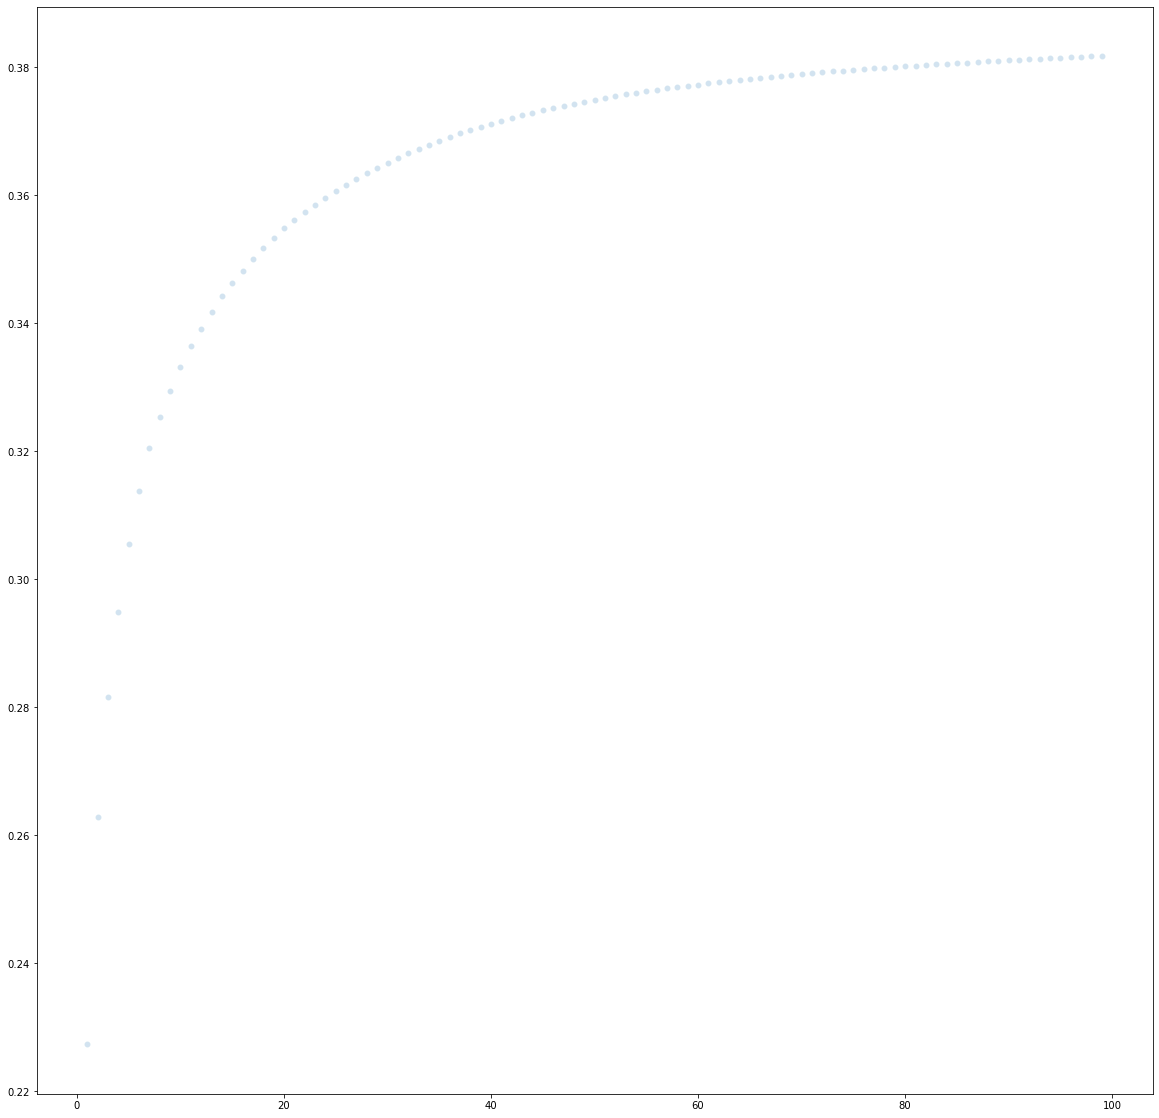

In [43]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores, alpha=0.2)
plt.show()

In [44]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
   

time diff: 18.367647000000034


In [45]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l2.append(amp)   
#     mtoc = time.perf_counter()
#     print(count, mtoc- mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

0 0.005982700000004115
1 0.005613900000071226
2 0.004711999999926775
3 0.004282699999976103
4 0.0041971999999077525
5 0.0047894000001633685
6 0.005675500000052125
7 0.005022000000053595
8 0.004687099999955535
9 0.00540669999986676
10 0.005367700000078912
11 0.005743900000197755
12 0.005748300000050222
13 0.005661299999928815
14 0.005393099999992046
15 0.005672199999935401
16 0.005634200000031342
17 0.006228400000054535
18 0.006288799999992989
19 0.006627600000001621
20 0.0063952999998946325
21 0.006353900000021895
22 0.006692199999861259
23 0.006720500000028551
24 0.006725400000050286
25 0.006359900000006746
26 0.006490700000085781
27 0.00641829999995025
28 0.00641459999997096
29 0.005471899999974994
30 0.0050874999999450665
31 0.004223600000159422
32 0.005227299999887691
33 0.004349600000068676
34 0.004173199999968347
35 0.004025399999818546
36 0.00412770000002638
37 0.0038704999999481515
38 0.004081399999904534
39 0.004161100000146689
40 0.003990299999941271
41 0.0040510000001177104


In [46]:
len(ft_l1)

3000

In [47]:
len(ft_l1[0])

2560

In [48]:
len(frq_l1)

2560

In [49]:
type(ft_l1)

list

In [50]:
dic_1 = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key = str(v) + "_a"
    dic_1[key] = value
        
    
    
    

KeyboardInterrupt: 

In [ ]:

for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(list(i)[c])
    key =  str(v) + "_b"
    dic_1[key] = value

In [ ]:
df_1 = pd.DataFrame(data = dic_1)

In [ ]:
p_scores_1 = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores_1, alpha=0.2)
plt.show()

In [ ]:
p_scores_1 = []
for i in np.arange(1,1000):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,1000), y=p_scores_1, alpha=0.2)
plt.show()

In [105]:
80/3.6

22.22222222222222

examine auto correllation for velocity 